<a href="https://colab.research.google.com/github/HenriqueCrj/AulasPython/blob/master/Projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Algoritmo de Machine Learning: Perceptron

Dentro do campo de machine learning existem basicamente 3 tipos de categorias de aprendizado:

*   Aprendizado supervisionado
*   Aprendizado não supervisionado
*   Aprendizado por reforço

###Aprendizado supervisionado
Aquele no qual o modelo precisa descobrir a relação entre entradas e saída a partir de dados de treino. Nesse tipo de aprendizado existe a necessidade de uma classificação dos dados a priori para posterior uso no treinamento do modelo.
###Aprendizado não supervisionado
O modelo precisa descobrir padrões e relações nos dados sem qualquer exemplo de saída. Muito utilizado para encontrar grupos de dados e estabelecer relações entre eles.
###Aprendizado por reforço
Nesse caso um agente receberá punições e/ou recompensas dependendo de suas interações com o ambiente, seja ele real ou virtual. No aprendizado por reforço o agente tenta atingir um ou mais objetivos enquanto se adapta, e de certa forma lembra a teoria da evolução natural.

---

##Perceptron
O Perceptron é um algoritmo de classificação binária, e se encaixa no conjunto de algoritmos de aprendizado supervisionado. Perceptrons podem ser combinados para criar uma rede capaz de classificar uma entrada em mais de duas categorias.

Abaixo é mostrado um exemplo de Perceptron.

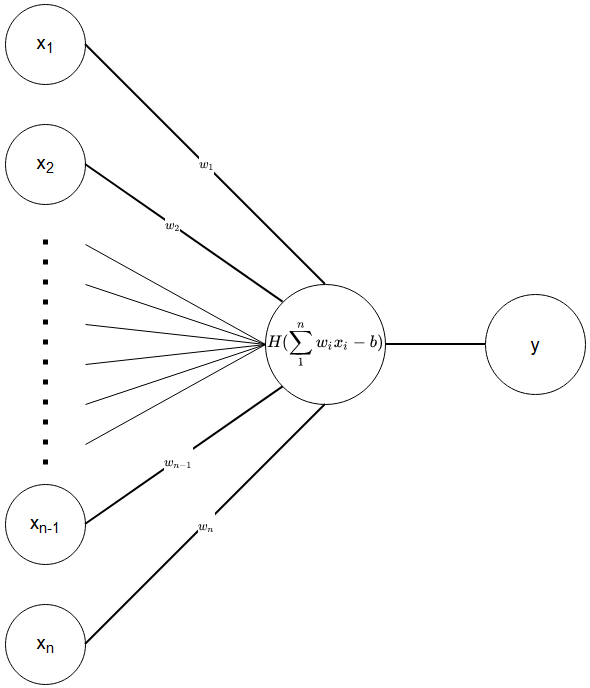


Na figura $x_i$ e $w_i$ representam o i-nésimo **input**(entrada) e **weight**(peso) respectivamente. Os inputs são as características do objeto que deve ser analisado e os pesos são valores que devem ser ajustados para representar a importância de cada input na determinação de um **output**(predição, saída ou resultado) representado pela letra $y$.

O processo de decisão num Perceptron é dado pela aplicação de uma função de ativação binária, a função de Heaviside.


$$\mathcal H(x - a) =   \begin{cases}
                            0, x \le a \\
                            1, x > a
                        \end{cases}
$$



Também existe uma versão dessa função usando a conveção de meio-máximo:


$$\mathcal H(x - a) =   \begin{cases}
                            0, x < a \\
                            1/2, x = a \\
                            1, x > a
                        \end{cases}
$$


No modelo construído nesse projeto foi utilizada a primeira versão da função de Heaviside.

In [ ]:
import numpy as np

class Perceptron2(): #Parte 1
    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        '''
        método de inicialização que tem os seguintes atributos:
        no_of_inputs: número de features passadas como input ao perceptron
        threshold: número de iterações de atualização do peso
        learning_rate: taxa com a qual os pesos são atualizados a cada iteração
        weights: inicialização dos pesos (dica: pode inicializar com método np.zeros). Não se esquecer que o vetor dos pesos
        terá no_of_inputs + 1 elementos por conta do bias que é o primeiro elemento.
        '''
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs+1)
           
    def predict(self, inputs):
        '''
        método de implementação da função de ativação.
        inputs: array com o conjunto de inputs (features). No projeto pedimos que considerassem o comprimento e largura da pétala da Iris.
        Não se esquecer que o produto da função de ativação é um produto escalar e pode ser calculado pelo método np.dot
        '''
        input_arr = np.append(1,inputs)
        z = np.dot(self.weights,input_arr)
        return np.heaviside(z,0)
        

    def train(self, training_inputs, labels):
        '''
        método de treino. É aqui que os pesos são atualizados um certo número de vezes (determinado pelo valor do threshold).
        Nesse método é feita a comparação entre o resultado da função de ativação (predição) e
        o resultado esperado (label).
        O método deve atualizar tanto os pesos quanto o bias (lembre que o bias é o primeiro valor do vetor peso e tem input 1.)
        A atualização é feita iterativamente um número (threshold) de vezes.
        '''
        self.weights = np.random.rand(self.weights.size)
        for j in range(self.threshold):
            for i in range(len(labels)):
                error = labels[i] - self.predict(training_inputs[i])
                self.weights[0] += self.learning_rate*error
                self.weights[1:] += self.learning_rate*error*training_inputs[i]

In [ ]:
#Usando scikit-learn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()

print(iris.target_names)
print(iris.feature_names)

X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(int)

perceptron_clf = Perceptron()
perceptron_clf.fit(X,y)

y_pred = perceptron_clf.predict([[2,0.5]])
print(y_pred)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0]


In [ ]:
#Usando o Perceptron do projeto
perceptron = Perceptron2(2)

#Alguns testes para fazer
"""#Grande influência (ponto muito para direita e para cima)
X = np.append(X,[[7,2]],axis=0)
y = np.append(y,[1])
"""
"""#Pouca influência
X = np.append(X,[[3.5,1.2]],axis=0)
y = np.append(y,[1])
"""

treino = perceptron.train(X,y)
print(f"Predição para uma Iris com pétala de 2 cm de comprimento e 0.5 cm de largura: {perceptron.predict([[2,0.5]])}\n") #Parte 2
count = 0
for x in X: #Parte 3
   if perceptron_clf.predict([x]) == perceptron.predict(x):
       count += 1
print(f"O perceptron criado possui {count*100/len(y):.2f}% das predições iguais ao perceptron do módulo scikit-learn\n")

Predição para uma Iris com pétala de 2 cm de comprimento e 0.5 cm de largura: 1.0

O perceptron criado possui 100.00% das predições iguais ao perceptron do módulo scikit-learn



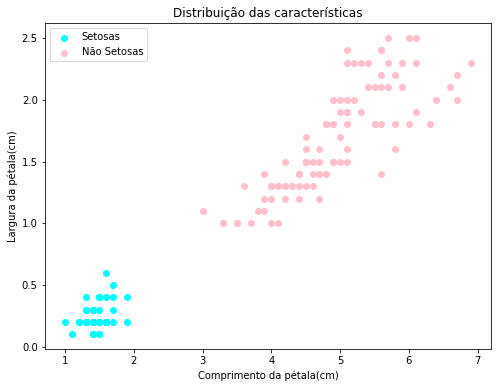

In [ ]:
not_setosas = X[y == 0]
setosas = X[y == 1]
fig,ax = plt.subplots(figsize=(8,6))
ax.set_title("Distribuição das características")
ax.scatter(setosas[:,0],setosas[:,1],color = "cyan",label="Setosas")
ax.scatter(not_setosas[:,0],not_setosas[:,1],color = "pink",label="Não Setosas")
ax.set_xlabel("Comprimento da pétala(cm)")
ax.set_ylabel("Largura da pétala(cm)")
ax.legend()
fig.show()

Da imagem acima podemos extrair que as Iris Setosas possuem pétalas pequenas em relação às outras Iris.

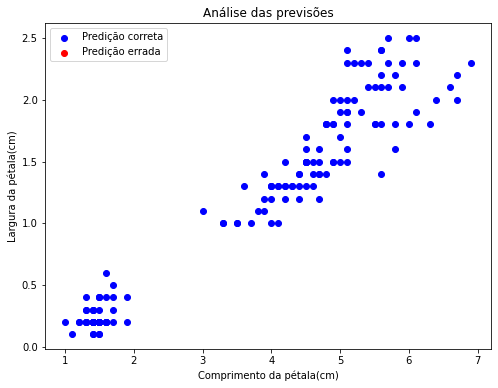

In [ ]:
predictions = np.array([perceptron.predict(x) for x in X])
right = np.array(X[predictions == y])
wrong = np.array(X[predictions != y])

fig,ax = plt.subplots(figsize=(8,6))
ax.set_title("Análise das previsões")
ax.scatter(right[:,0],right[:,1],color = "blue",label="Predição correta")
ax.scatter(wrong[:,0],wrong[:,1],color = "red",label="Predição errada")
ax.set_xlabel("Comprimento da pétala(cm)")
ax.set_ylabel("Largura da pétala(cm)")
ax.legend()
fig.show()

O modelo é altamente sensível aos pontos extremos, portanto 1 input "mal posicionado" tem grande influência nos seus parâmetros. 

In [ ]:
total_setosas = setosas.size
correct_setosas_pred = right[right[:,0] < 2].size
print(f"O modelo teve {right.size*100/X.size}% das previsões corretas")
print(f"{correct_setosas_pred*100/total_setosas}% das Iris Setosas foram previstas corretamente")

O modelo teve 100.0% das previsões corretas
100.0% das Iris Setosas foram previstas corretamente


In [ ]:
#Plota os tipos de erros de predição(se existirem)
difference = y - predictions
false_positive = []
false_negative = []
for i in range(len(y)):
    if difference[i] == -1:
        false_positive.append(X[i])
    elif difference[i] == 1:
        false_negative.append(X[i])
false_positive = np.array(false_positive)
false_negative = np.array(false_negative)
if false_positive.size or false_negative.size:
    fig,ax = plt.subplots(figsize=(8,6))
    ax.set_title("Tipos de erro do modelo")
    if false_positive.size:
        ax.scatter(false_positive[:,0],false_positive[:,1],color="green",label="Falso positivo")
    if false_negative.size:
        ax.scatter(false_negative[:,0],false_negative[:,1],color="orange",label="Falso negativo")
    ax.set_xlabel("Comprimento da pétala(cm)")
    ax.set_ylabel("Largura da pétala(cm)")
    ax.legend()
    fig.show()

No gráfico acima são exibidos os pontos para os quais o modelo previu um resultado negativo, quando na verdade era positivo e vice-versa.


###Outros possíveis casos para aplicação do modelo perceptron: 

*   Classificar um tumor como maligno ou benigno
*   Saber se uma pessoa pode fazer um empréstimo no banco
*   Previsão de chuva ou outro aspecto climático(de característica binária)
*   Indicar se um visitante de um site é um possível comprador

O modelo não funcionará caso existam mais de duas categorias para classificar por conta de seu comportamento binário. Além disso se os dados não forem linearmente separáveis a precisão das predições pode cair rapidamente.

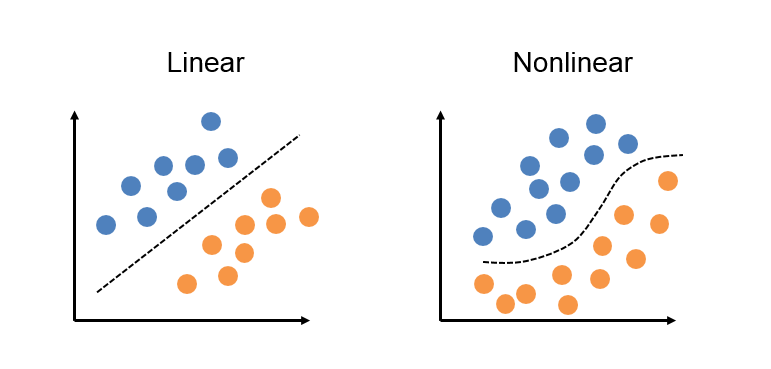

*https://jtsulliv.github.io/images/perceptron/linsep_new.png?raw=True*

Um fator importante a ser considerado não somente no modelo Perceptron, mas em qualquer outro, é o balanço dos dados. Um desbalanceamento pode enviesar o algoritmo, prejudicando sua eficácia.

*Criado por Marcio Sirimarco e Henrique Combochi*
